- ### Planteamiento del problema:

¿Cuál será la prima (coste) de la póliza de los clientes en función de sus datos fisiológicos?

In [27]:
# Se importa el dataset
import pandas as pd

url = 'https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv'
dataframe = pd.read_csv(url)

- ### Exploración y limpieza de datos:

In [28]:
# Primera apreciacion del dataset
filas = dataframe.shape[0]
columnas = dataframe.shape[1]
print(f'Filas: {filas} | Columnas: {columnas}')
print()
print(dataframe.info())

Filas: 1338 | Columnas: 7

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [29]:
dataframe.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [30]:
print(dataframe.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [31]:
print(dataframe.sex.unique())
print(dataframe.smoker.unique())
print(dataframe.region.unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [32]:
dataframe.dtypes.value_counts()

object     3
int64      2
float64    2
Name: count, dtype: int64

- Inicialmente se puede observar que no existen valores nulos en ninguna de las variables.
- Hay 1.338 registros y 7 clases incluyendo la clase a predecir.
- Hay 3 variables categóricas y 4 numéricas.

In [33]:
# Se verifica la existencia de duplicados
duplicados = dataframe.duplicated().sum()
print(f'Existen {duplicados} registros duplicados.')
print(f'El % de registros "duplicados" es {duplicados/filas}.')

Existen 1 registros duplicados.
El % de registros "duplicados" es 0.0007473841554559044.


In [34]:
# Se eliminan los registros duplicados

dataframe.drop_duplicates(inplace = True)

print(f'Se eliminaron {filas-(dataframe.shape[0])} duplicados')

Se eliminaron 1 duplicados


Inicialmente todas las clases parecen ser relevantes respecto a la variable a predecir. Es por ello que no se eliminará ninguna.

- ### Análisis univariante:

##### Para variables categóricas

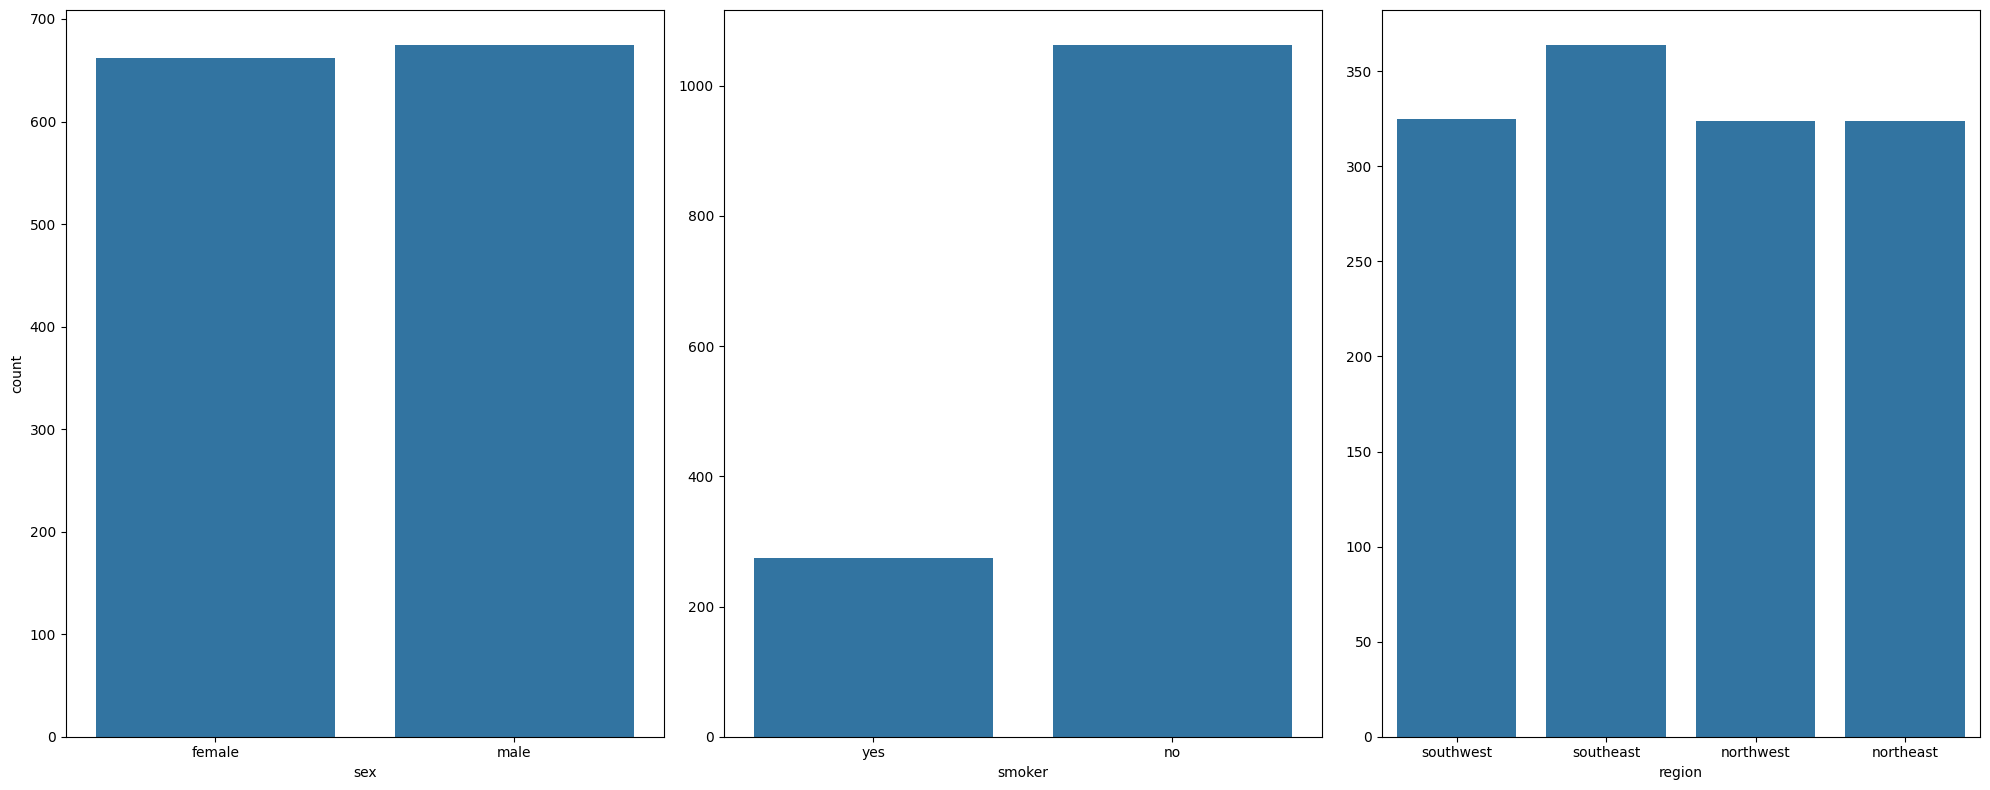

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(1,3, figsize = (20, 8))

sns.countplot(ax = axis[0], data = dataframe, x = 'sex')
sns.countplot(ax = axis[1], data = dataframe, x = 'smoker').set(ylabel = None)
sns.countplot(ax = axis[2], data = dataframe, x = 'region').set(ylabel = None)

plt.tight_layout()

plt.show()

In [36]:
smoker_yes = len(dataframe.query("smoker == 'yes'"))
smoker_no = len(dataframe.query("smoker == 'no'"))

print(f'La relación entre la población no fumadora y fumadora es de: {round(smoker_no/smoker_yes,2)}')

La relación entre la población no fumadora y fumadora es de: 3.88


- Existe una proporción similar de hombres y mujeres en la población estudiada.
- La relación entre la población no fumadora y fumadora es aprox. 4:1
- La población está prácticamente distribuida uniformemente entre las 4 regiones, aunque un Southeast posee un poco más de clientes.

##### Para variables numéricas

/workspaces/EDA/EDA-env/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/workspaces/EDA/EDA-env/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/workspaces/EDA/EDA-env/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/workspaces/EDA/EDA-env/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


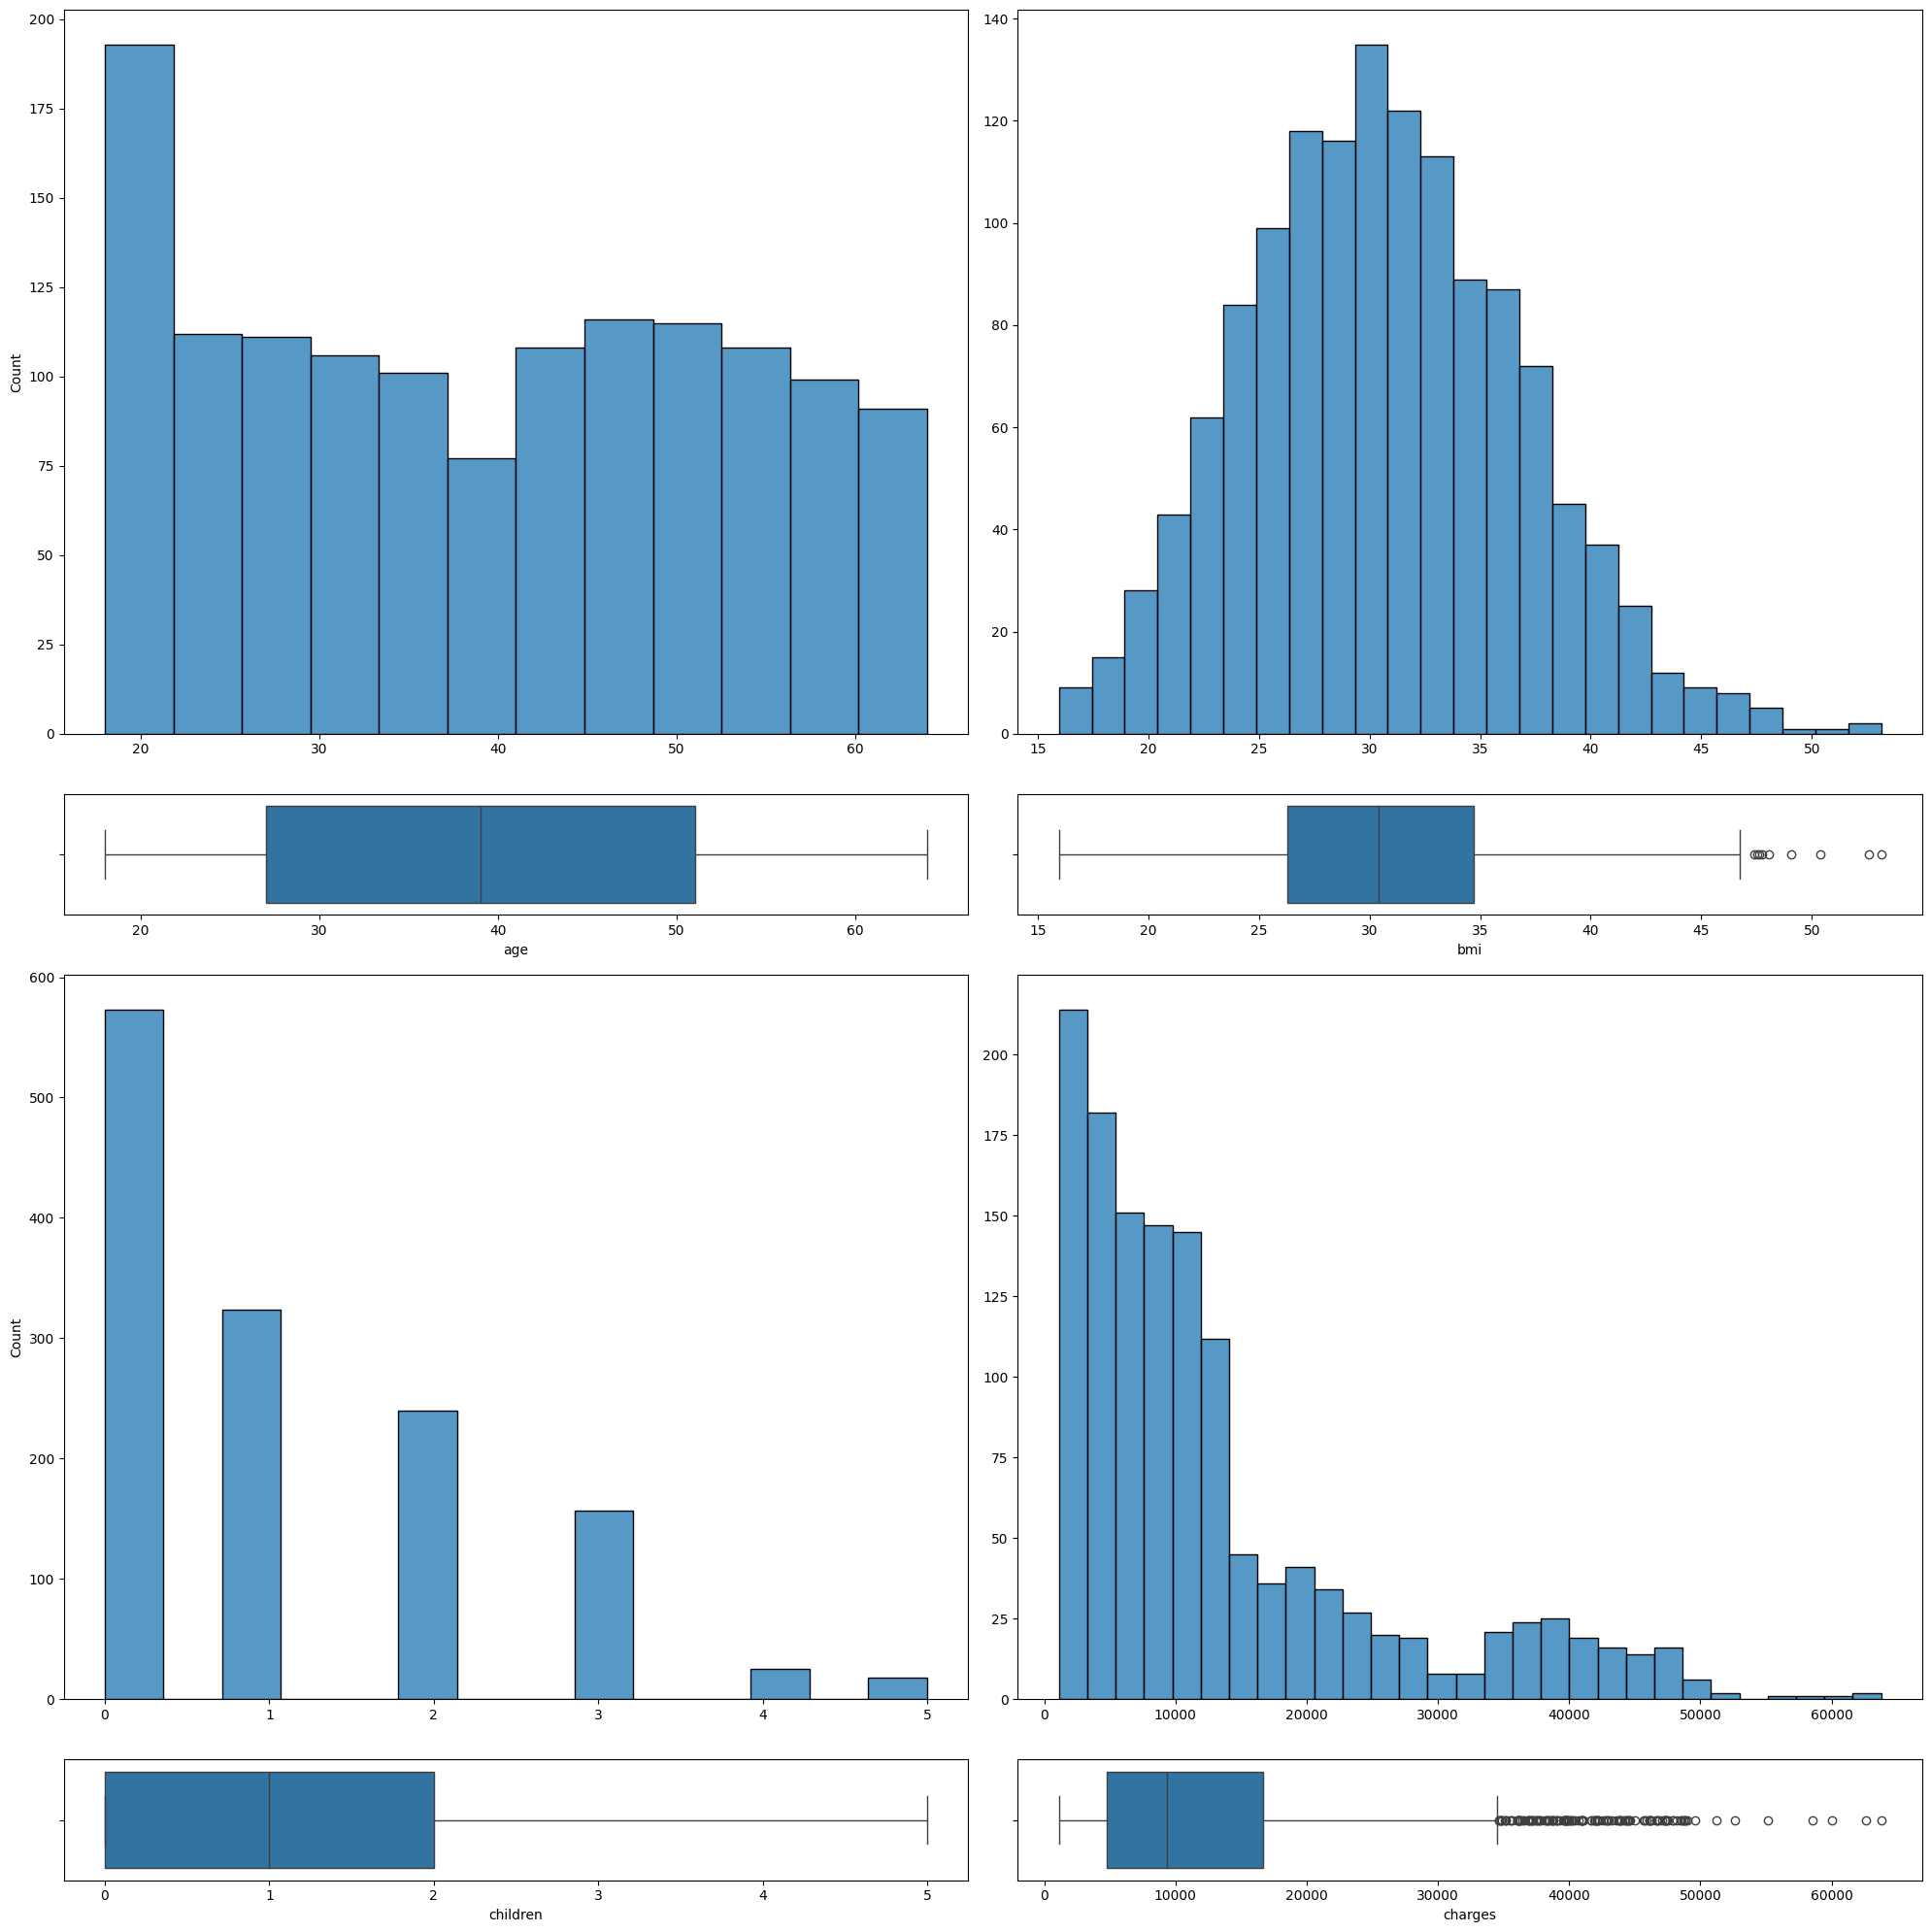

In [37]:
fig, axis = plt.subplots(4, 2, figsize = (20,20), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

sns.histplot(ax = axis[0,0], data = dataframe, x = 'age').set(xlabel = None)
sns.boxplot(ax = axis[1,0], data = dataframe, x = 'age')

sns.histplot(ax = axis[0,1], data = dataframe, x = 'bmi').set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1,1], data = dataframe, x = 'bmi')

sns.histplot(ax = axis[2,0], data = dataframe, x = 'children').set(xlabel = None)
sns.boxplot(ax = axis[3,0], data = dataframe, x = 'children')

sns.histplot(ax = axis[2,1], data = dataframe, x = 'charges').set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3,1], data = dataframe, x = 'charges')

plt.tight_layout()

plt.show()

- La edades están bastante uniformemente distribuidas, sin valores a típicos.
- El índice de masa corporal presenta una distribución muy cercana a la normalcon muy pocos valores atípicos.
- La mayoría de los clientes tienen entre 0 y 3 hijos, aunque viendo cada grupo individual, la gran mayoría no tiene hijos.
- Para el costo de la póliza, existe una importante importante cantidad de avlores atípicos, además los datos están sesgados hacia la izquierda.

- ### Análisis multivariante:

##### Para categóricas

/workspaces/EDA/EDA-env/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/workspaces/EDA/EDA-env/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


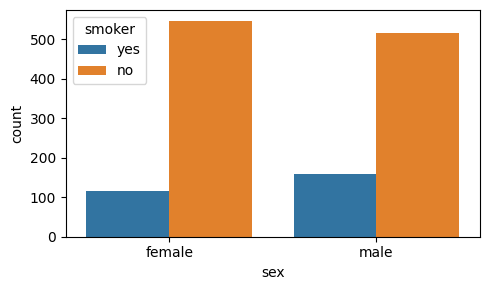

In [38]:
plt.figure(figsize = (5,3))

sns.countplot(data = dataframe, x = 'sex', hue = 'smoker')

plt.tight_layout()

plt.show()


In [39]:
smoker_yes_men = len(dataframe.query("smoker == 'yes' & sex == 'male'"))
smoker_no_men = len(dataframe.query("smoker == 'no' & sex == 'male'"))

smoker_yes_women = len(dataframe.query("smoker == 'yes' & sex == 'female'"))
smoker_no_women = len(dataframe.query("smoker == 'no' & sex == 'female'"))

print(f'La relación entre la población no fumadora y fumadora entre mujeres es de: {round(smoker_no_women/smoker_yes_women,2)}')
print(f'La relación entre la población no fumadora y fumadora entre hombres es de: {round(smoker_no_men/smoker_yes_men,2)}')

La relación entre la población no fumadora y fumadora entre mujeres es de: 4.76
La relación entre la población no fumadora y fumadora entre hombres es de: 3.25


Proporcionalmente hablando, la población femenina es menos fumadora que la masculina

##### Combinación de clases

/workspaces/EDA/EDA-env/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/workspaces/EDA/EDA-env/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


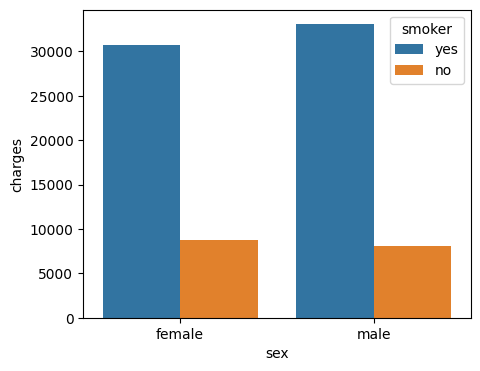

In [40]:
plt.figure(figsize = (5,4))

sns.barplot(data = dataframe, x = 'sex', y = 'charges', hue = 'smoker', errorbar=None)

plt.show()

- El costo promedio de la póliza en la población fumadora es mayor que en la población no fumadora, tanto para hombres como para mujeres.
- El costo promedio de la póliza en mujeres no fumadoras es mayor que en hombres no fumadores.
- El costo promedio de la póliza en mujeres fumadoras es menor que en hombres fumadores.

##### Para numéricas

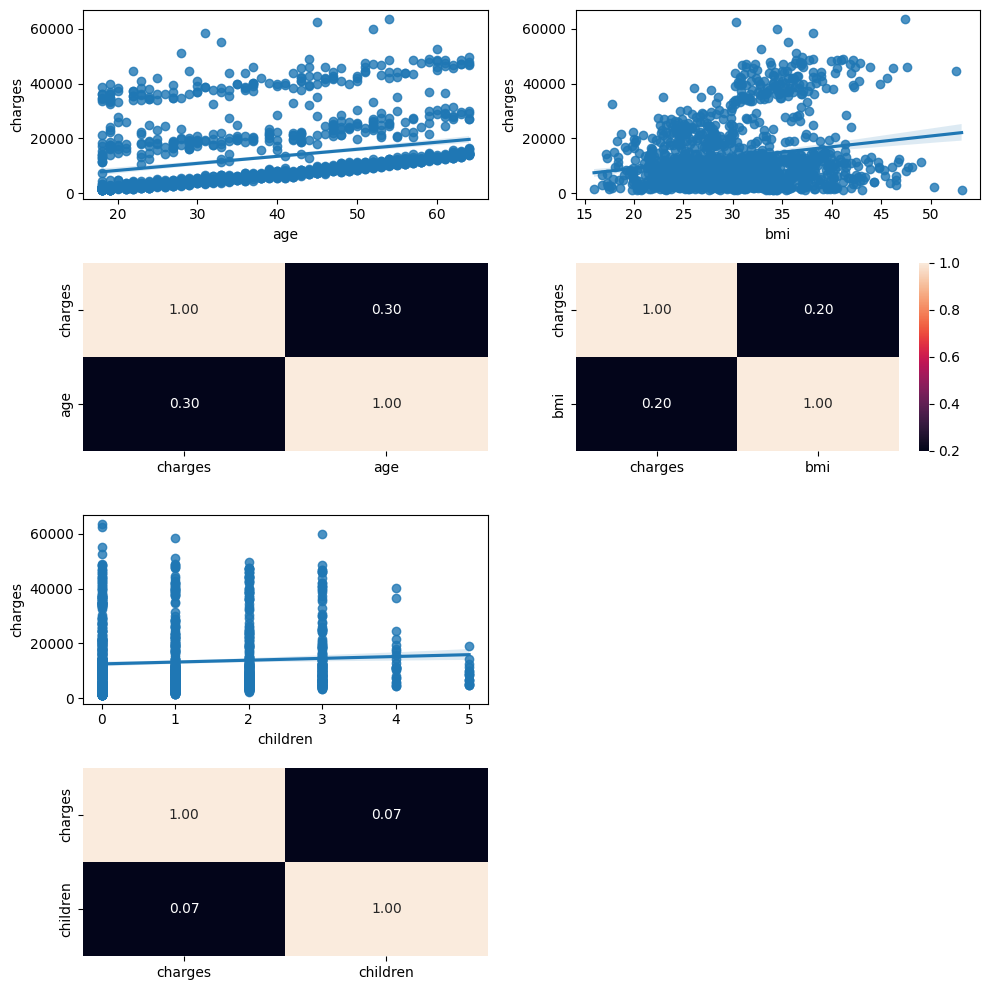

In [41]:
fig, axis = plt.subplots(4, 2, figsize = (10, 10))

sns.regplot(ax = axis[0,0], data = dataframe, x = 'age', y = 'charges')
sns.heatmap(dataframe[['charges', 'age']].corr(), ax = axis[1,0], annot = True, fmt = ".2f", cbar = False)

sns.regplot(ax = axis[0,1], data = dataframe, x = 'bmi', y = 'charges')
sns.heatmap(dataframe[['charges', 'bmi']].corr(), ax = axis[1,1], annot = True, fmt = ".2f")

sns.regplot(ax = axis[2,0], data = dataframe, x = 'children', y = 'charges')
sns.heatmap(dataframe[['charges', 'children']].corr(), ax = axis[3,0], annot = True, fmt = ".2f", cbar = False)

subplots_remove = [axis[2, 1], axis[3, 1]]

for ax in subplots_remove:

    fig.delaxes(ax)

plt.tight_layout()

plt.show()

- Las relaciones entre estas variables independientes y la dependiente no son muy fuertes, aunque sí existe relación lineal.
- Tal como se esperaba existe relación directa entre la edad y el precio de la póliza y el índice de masa corporal y el precio de la póliza.
- La relación directa entre la cantidad de hijos y el precio no es significancia importante.

- ### Análisis Numérico-Categórico completo:

In [42]:
#Normalizacion de las variables categóricas
dataframe["sex"] = pd.factorize(dataframe["sex"])[0]
dataframe["smoker"] = pd.factorize(dataframe["smoker"])[0]
dataframe["region"] = pd.factorize(dataframe["region"])[0]

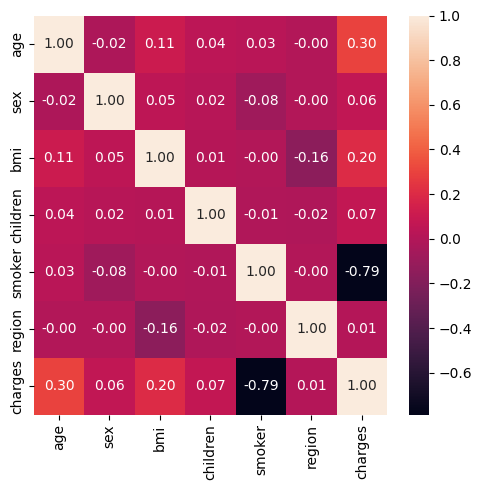

In [43]:
plt.figure(figsize = (5,5))

sns.heatmap(dataframe[['age', 'sex', 'bmi', 'children', 'smoker', 'region',
                       'charges']].corr(), annot = True, fmt = ".2f", annot_kws={'size': 10})

plt.tight_layout()
plt.show()

- No hay correlación importante entre las variables independientes, por lo cual no existen problemas de multicolinealidad.
- Como ya se había visto anteriormente, existe una relación inversa e importante entre población fumadora y el precio de la póliza, es decir, población fumadora se incrementan los precios.
- La región, el sexo y la cantidad de hijos no tienen una relación lineal relevante con la variable dependiente. Por lo cual no se tomarán en cuenta para el entrenamiento del modelo.


Se escalan los datos con StandardScaler este método es menos sensible a los outliers, no se eliminan outliers, se desea esperar el rendimiento del modelo y en dado caso se podrian usar métodos de regularización antes de tratar esos datos.

In [44]:
dataframe.drop(['region','children','sex'], axis = 1, inplace = True)
print(dataframe.head(2))

   age    bmi  smoker     charges
0   19  27.90       0  16884.9240
1   18  33.77       1   1725.5523


- ### Escalado/Normalizacion

In [45]:
#Primero se separan los conjuntos de train y test
from sklearn.model_selection import train_test_split

X = dataframe.drop(['charges'], axis = 1)
y = dataframe['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [46]:
n_columns = X.columns.tolist()

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_train = pd.DataFrame(X_train_scaled, index = X_train.index, columns = n_columns)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled, index = X_test.index, columns = n_columns)

In [48]:
print(X_train.head(2))

           age       bmi    smoker
1114 -1.157680 -0.996928  0.500292
968  -1.300619 -0.792762  0.500292


#### Linear regression

In [49]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [50]:
y_predict = model.predict(X_test)

In [51]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

print(f"Mean squared error: {mean_squared_error(y_test, y_predict)}")
print(f'RMSE:{np.sqrt(mean_squared_error(y_test, y_predict))}')
print(f"Coefficient of determination: {r2_score(y_test, y_predict)}")

Mean squared error: 35841574.8181475
RMSE:5986.783344847841
Coefficient of determination: 0.8049502474643173


Este tipo de modelo no cuenta con hiperparámetros para optimizar.